
# **Introduction**
This is a 5 layers Sequential Convolutional Neural Network for digits recognition trained on MNIST dataset. We choosed to build it with keras API (Tensorflow backend) which is very intuitive. Firstly, we will prepare the data (handwritten digits images) then we will focus on the CNN modeling and evaluation.

We can divide our project into 4 parts
Part 1 :- Preparing data
Part 2 :- Visualisation
Part 3 :- Creating Model
Part 4 :- Evaluation of Model


Step 1 :- Importing Neccessary Libraries

In [37]:
import numpy as np
import pandas as pd
from sklearn import model_selection as msl


In [38]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


Step 2 :- Importing Data

In [39]:
#constant
img_height = 256
img_width = 256
batch_size = 32
n_classes = 2


In [40]:
# data should contain sub-folders named something like class1 and class2
# "seed" :- Optional random seed for shuffling and transformations.

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "data/",
    image_size =(img_height, img_width),
    batch_size = batch_size,
    validation_split = 0.2,
    subset = "training",
    seed = 120
)



Found 253 files belonging to 2 classes.
Using 203 files for training.


In [41]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    "data/",
    image_size = (img_height, img_width),
    batch_size = batch_size,
    validation_split = 0.2,
    subset = "validation",
    seed = 120

)

Found 253 files belonging to 2 classes.
Using 50 files for validation.


In [42]:
class_names = train_ds.class_names
class_names

['no', 'yes']

Plotting Images for Visualisation

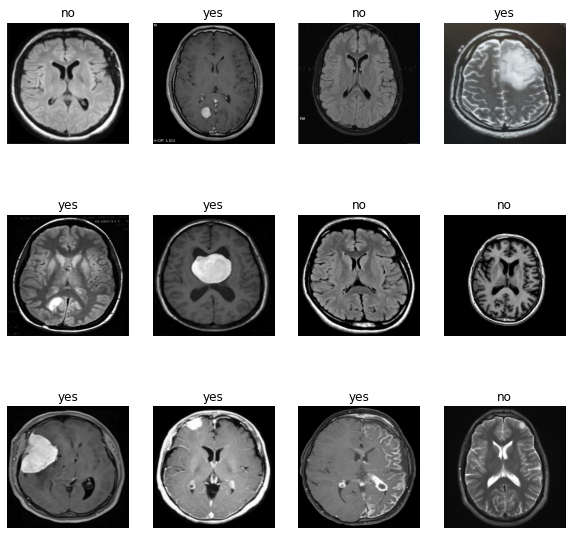

In [43]:

plt.figure(figsize =(10,10))
for image_batch, label_batch in dataset.take(1): # taking 1 batch of 32 images
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [55]:
# Conv2D is main neuron layer
# MaxPooling2D is 2*2 filter 
# Dropout layer is used to prevent overfitting ( this layer randomly drops some weights )

input_shape = (batch_size, image_size, image_size, n_classes)

model = models.Sequential([
    
    layers.Rescaling(1./255, input_shape = (img_height, img_width, 3)),
    layers.RandomFlip("horizontal", input_shape = (img_height, img_width, 3)), #data augmentation layer
    
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape = input_shape),  # 32 features / layers / features, (3,3) is filter size
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (3,3), activation='relu'), 
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'), 
    layers.MaxPooling2D((2,2)),    
    
    layers.Conv2D(64, (3,3), activation='relu'), 
    layers.MaxPooling2D((2,2)),   
    
    layers.Conv2D(64, (3,3), activation='relu'), 
    layers.MaxPooling2D((2,2)),    
    
    layers.Conv2D(64, (3,3), activation='relu'), 
    layers.MaxPooling2D((2,2)),   
    
    layers.Flatten(),
    
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax')
])

model.build(input_shape = input_shape)


In [45]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [46]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 random_flip_2 (RandomFlip)  (None, 256, 256, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 127, 127, 32)      0         
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                      

In [50]:
epochs = 25
history = model.fit(
    train_ds,
    epochs = epochs,
    batch_size = batch_size,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/25
7/7 [==============================] - 10s 1s/step - loss: 0.6360 - accuracy: 0.6798 - val_loss: 0.6324 - val_accuracy: 0.8000
Epoch 2/25
7/7 [==============================] - 13s 2s/step - loss: 0.5993 - accuracy: 0.7488 - val_loss: 0.5430 - val_accuracy: 0.8000
Epoch 3/25
7/7 [==============================] - 13s 2s/step - loss: 0.5386 - accuracy: 0.7340 - val_loss: 0.5778 - val_accuracy: 0.7000
Epoch 4/25
7/7 [==============================] - 12s 2s/step - loss: 0.5287 - accuracy: 0.7488 - val_loss: 0.5097 - val_accuracy: 0.8000
Epoch 5/25
7/7 [==============================] - 13s 2s/step - loss: 0.4817 - accuracy: 0.7685 - val_loss: 0.4931 - val_accuracy: 0.8200
Epoch 6/25
7/7 [==============================] - 13s 2s/step - loss: 0.4471 - accuracy: 0.7882 - val_loss: 0.4987 - val_accuracy: 0.8200
Epoch 7/25
7/7 [==============================] - 13s 2s/step - loss: 0.4382 - accuracy: 0.8227 - val_loss: 0.5147 - val_accuracy: 0.7800
Epoch 8/25
7/7 [==================

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


Text(0.5, 1.0, 'Training and Validation Loss')

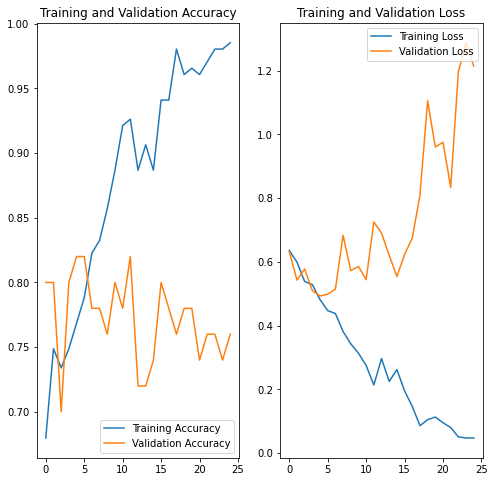

In [52]:
plt.figure(figsize=(8,8))

plt.subplot(1,2,1)
plt.plot(range(epochs), acc, label = 'Training Accuracy')
plt.plot(range(epochs), val_acc, label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(epochs), loss, label = 'Training Loss')
plt.plot(range(epochs), val_loss, label = 'Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [54]:
image_path = "data/test/test1.jpg"

img = tf.keras.utils.load_img(
    image_path, 
    target_size = (img_height, img_width)
)


img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict( img_array )
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to yes with a 72.99 percent confidence.
